# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [12]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

<AxesSubplot: >

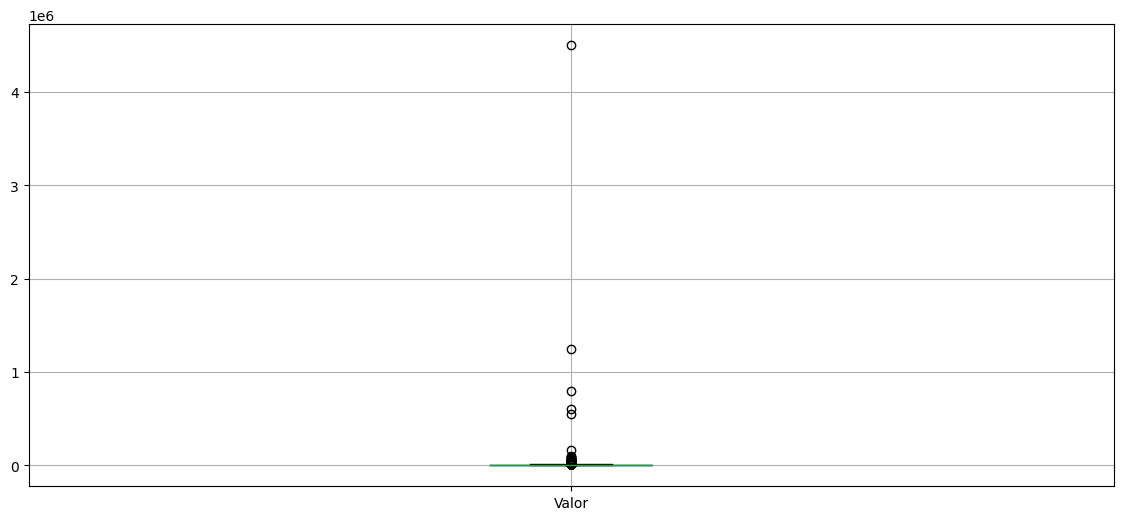

In [13]:
dados.boxplot(['Valor'])

In [14]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN


In [15]:
valor = dados['Valor']

In [16]:
# Primeiro, calcularemos Q1 o primeiro quartil.
# Teremos como resultado o valor 1600.0. Assim feito, prosseguiremos com o cálculo de Q3 e em seguida IIQ, o intervalo interquatílico. Precisamos, ainda, calcular os limites, 
# que chamaremos de limite_inferior e limite_superior.
Q1 = valor.quantile(.25)
Q1

1500.0

In [17]:
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [18]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

array([[<AxesSubplot: title={'center': 'Valor'}>]], dtype=object)

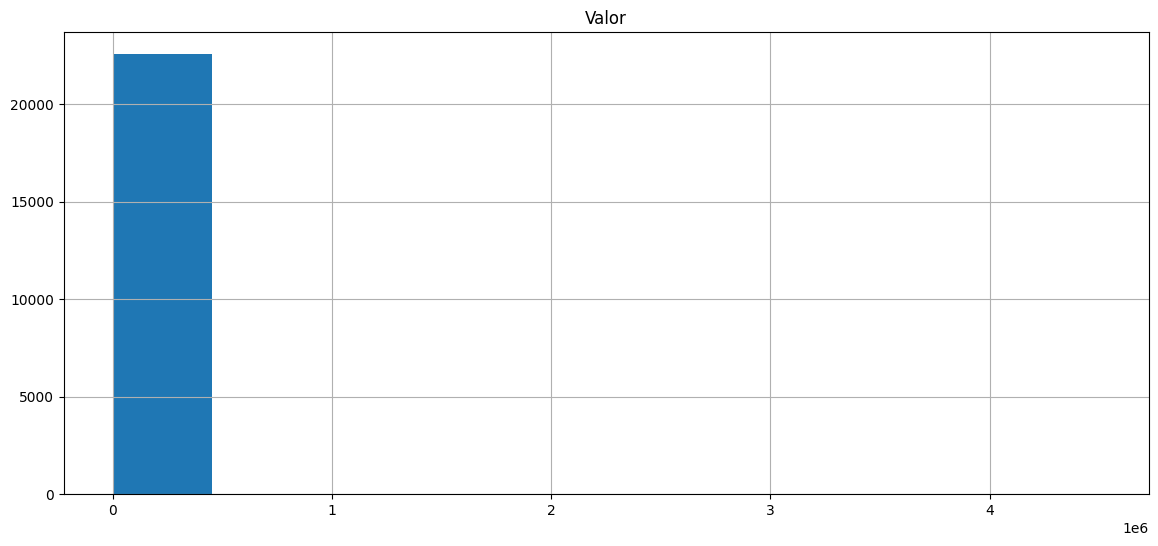

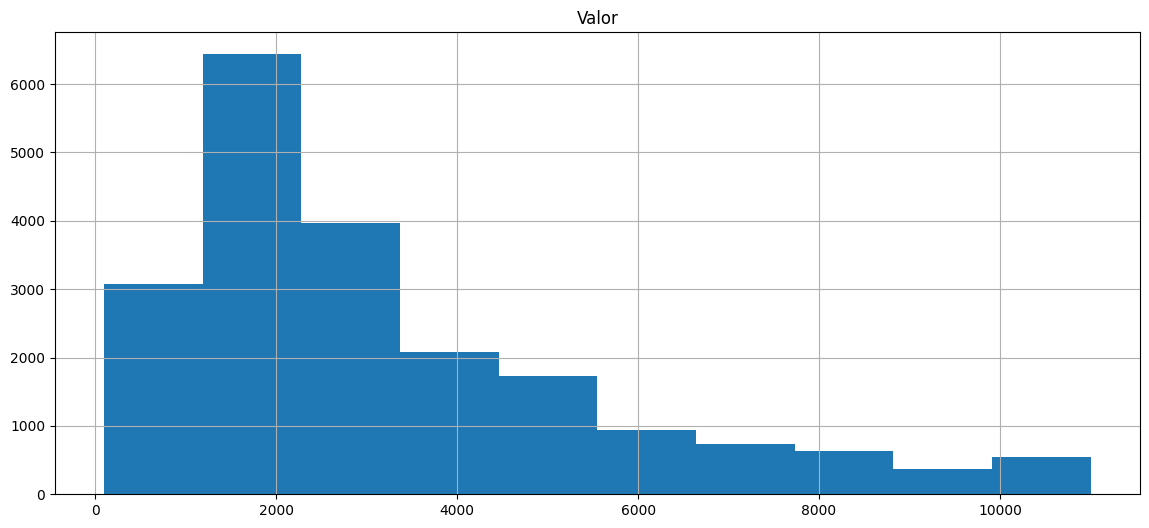

In [19]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])